<span style="font-family:Calibri">

---

# 🚀 **Hill Climbing Algorithm**

### *Introduction to Artificial Intelligence*  
*2024/2025*

**Universidad de Deusto**  
*Valle Varo*

---

## 🔍 **What is Hill Climbing?**
Hill Climbing is an iterative algorithm that is used for mathematical optimization problems. It starts with an arbitrary solution and iteratively makes small changes to the solution, selecting the neighboring state that optimizes the objective function. This process is repeated until no better neighboring state is available, at which point a local optimum is reached.

> Hill Climbing is considered a **local search algorithm**, as it explores neighboring solutions in the search space. The algorithm is used in many applications such as **robotics, artificial intelligence, operations research, and other areas**.

---

![](https://www.tutorialandexample.com/wp-content/uploads/2019/07/State-space-Landscape-of-Hill-climbing-algorithm.png)


## 🎯 **Key Concepts** 

1. **Objective Function**: The function we aim to optimize (minimize or maximize).
2. **Neighboring State**: A state that is a slight variation of the current state.
3. **Local Optimum**: The best solution in the immediate vicinity of the current state.
4. **Global Optimum**: The best possible solution across the entire search space.
5. **Greedy Approach**: The algorithm always moves towards the neighboring state that optimizes the objective function, without considering future consequences.

---

## 🏔️ **Types of Hill Climbing**

Let’s explore the different "flavors" of Hill Climbing 🍦:

1. **Simple Hill Climbing** 🌱:
   - The algorithm moves to the first neighbor that offers a better solution.
   
2. **Steepest Ascent Hill Climbing** 🧗:
   - The algorithm evaluates all neighboring states and chooses the one that improves the objective function the most. 

3. **Stochastic Hill Climbing** 🎲:
   - The algorithm randomly selects a neighbor and moves to it if it improves the objective function.

---

## 💻 **Hill Climbing Pseudocode**

Here’s the basic recipe to make your Hill Climbing algorithm work:

```python
1. Start with a random solution (current_solution).
2. Repeat until you reach a local optimum:
   a. Look at the neighbors of your current solution.
   b. Pick the neighbor that improves the objective function the most.
   c. If this neighbor is better:
      i. Move there (make it your new current solution).
   d. If no neighbors are better:
      i. You’ve reached a local optimum — stop!
3. Return your current solution as the best found.


## Import libraries


In [1]:
import numpy as np
from copy import copy
import random
import matplotlib.pyplot as plt

## Preprocessing data

### Load Data

In [2]:
with open('dj38.tsp') as f:
    file = f.read().split("\n")
    #print(file)
    index=[]
    x=[]
    y = []
    for i in file:
        a , b, c = i.split()
        index.append(int(a)-1) # in here I change city numbers from 1 to m into 0 to m-1 to be same as list index
        x.append(float(b))
        y.append(float(c))
print(index)
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[11003.6111, 11108.6111, 11133.3333, 11155.8333, 11183.3333, 11297.5, 11310.2778, 11416.6667, 11423.8889, 11438.3333, 11461.1111, 11485.5556, 11503.0556, 11511.3889, 11522.2222, 11569.4444, 11583.3333, 11595.0, 11600.0, 11690.5556, 11715.8333, 11751.1111, 11770.2778, 11785.2778, 11822.7778, 11846.9444, 11963.0556, 11973.0556, 12058.3333, 12149.4444, 12286.9444, 12300.0, 12355.8333, 12363.3333, 12372.7778, 12386.6667, 12421.6667, 12645.0]
[42102.5, 42373.8889, 42885.8333, 42712.5, 42933.3333, 42853.3333, 42929.4444, 42983.3333, 43000.2778, 42057.2222, 43252.7778, 43187.2222, 42855.2778, 42106.3889, 42841.9444, 43136.6667, 43150.0, 43148.0556, 43150.0, 42686.6667, 41836.1111, 42814.4444, 42651.9444, 42884.4444, 42673.6111, 42660.5556, 43290.5556, 43026.1111, 42195.5556, 42477.5, 43355.5556, 42433.3333, 43156.3889, 43189.1667, 42711.3889, 43334.722

### Display data

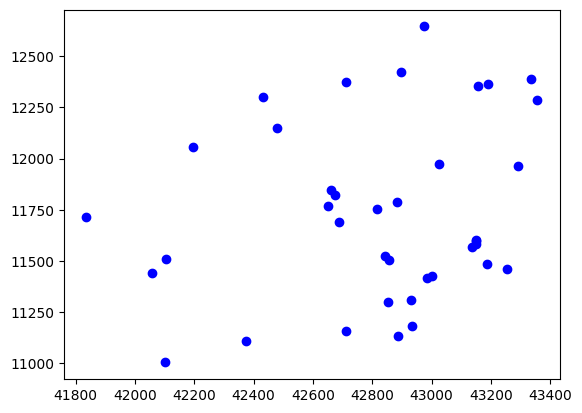

In [3]:
plt.plot(y, x, 'o', color='blue');

## Define Functions

### Computing distance between two cities (Function):

In [4]:
def distance(x1,y1 ,x2,y2):
  dis = np.sqrt(np.square(x1-x2) + np.square(y1-y2))
  return dis

### Make matrix of distance:

In [5]:
def tsp_matrix(x,y):
  tsp = []
  row = []
  for i in range(len(x)):
    row.clear()
    for j in range(len(x)):
      row.append(distance(x[i],y[i] ,x[j],y[j]))
    r = copy(row)
    tsp.append(r)
  return tsp

In [6]:
M = tsp_matrix(x,y)

### Make random solution

In [7]:
def random_solution(tsp):
  cities = list(range(len(tsp)))
  solution = []

  for i in range(len(tsp)):
    random_city = cities[random.randint(0,len(cities)-1)]
    solution.append(random_city)
    cities.remove(random_city)

  return solution

In [8]:
# test of function
tsp = tsp_matrix(x,y)
print(random_solution(tsp))
print(f'Number of cities visited: {len(random_solution(tsp))}')

[22, 27, 32, 18, 3, 9, 0, 17, 10, 34, 5, 12, 30, 15, 26, 36, 28, 8, 29, 19, 23, 35, 4, 31, 25, 7, 37, 20, 33, 16, 24, 14, 11, 6, 13, 1, 21, 2]
Number of cities visited: 38


### Find routelength of solution

In [9]:
def route_length(tsp, solution):
  """
  Function input is tsp and solution which tsp is matrix of distance between cites and solution is list of cites

  The output is length of solution from firt city to the goal (cost)
  """
  length = 0
  for i in range(len(solution)):
    length += tsp[solution[i-1]][solution[i]]
  return length

In [10]:
# test
tsp = tsp_matrix(x,y)
rands = random_solution(tsp)
print(route_length(tsp,rands))


30634.262247938037


### Find neighbors of a solution


In [12]:
random_solution(tsp)

[23,
 18,
 16,
 0,
 11,
 15,
 31,
 5,
 24,
 7,
 6,
 17,
 2,
 34,
 27,
 37,
 22,
 35,
 8,
 1,
 36,
 26,
 3,
 19,
 33,
 32,
 25,
 13,
 21,
 4,
 30,
 28,
 9,
 29,
 12,
 20,
 14,
 10]

In [13]:
def find_neighbors(solution):
  neighbors = []
  for i in range(len(solution)): #This for loop will make new list from solution by changing element positions
    for j in range(i+1,len(solution)):
      a = solution.copy()
      a[i] = solution[j]
      a[j] = solution[i]
      neighbors.append(a)
  return neighbors

In [15]:
# test
#solution = random_solution(tsp)
print(find_neighbors(random_solution(tsp)))

[[19, 2, 1, 14, 4, 11, 3, 8, 20, 33, 35, 16, 28, 9, 31, 30, 29, 26, 15, 13, 37, 0, 18, 24, 5, 12, 7, 10, 36, 25, 22, 6, 34, 21, 17, 27, 32, 23], [1, 19, 2, 14, 4, 11, 3, 8, 20, 33, 35, 16, 28, 9, 31, 30, 29, 26, 15, 13, 37, 0, 18, 24, 5, 12, 7, 10, 36, 25, 22, 6, 34, 21, 17, 27, 32, 23], [14, 19, 1, 2, 4, 11, 3, 8, 20, 33, 35, 16, 28, 9, 31, 30, 29, 26, 15, 13, 37, 0, 18, 24, 5, 12, 7, 10, 36, 25, 22, 6, 34, 21, 17, 27, 32, 23], [4, 19, 1, 14, 2, 11, 3, 8, 20, 33, 35, 16, 28, 9, 31, 30, 29, 26, 15, 13, 37, 0, 18, 24, 5, 12, 7, 10, 36, 25, 22, 6, 34, 21, 17, 27, 32, 23], [11, 19, 1, 14, 4, 2, 3, 8, 20, 33, 35, 16, 28, 9, 31, 30, 29, 26, 15, 13, 37, 0, 18, 24, 5, 12, 7, 10, 36, 25, 22, 6, 34, 21, 17, 27, 32, 23], [3, 19, 1, 14, 4, 11, 2, 8, 20, 33, 35, 16, 28, 9, 31, 30, 29, 26, 15, 13, 37, 0, 18, 24, 5, 12, 7, 10, 36, 25, 22, 6, 34, 21, 17, 27, 32, 23], [8, 19, 1, 14, 4, 11, 3, 2, 20, 33, 35, 16, 28, 9, 31, 30, 29, 26, 15, 13, 37, 0, 18, 24, 5, 12, 7, 10, 36, 25, 22, 6, 34, 21, 17, 27, 

### Find best neighbor

In [16]:
def find_best_neighbor(tsp , neighbors):
  best_neighbor_length = route_length(tsp, neighbors[0]) # Initial answer
  best_neighbor = neighbors[0]

  for i in neighbors:
    current_length = route_length(tsp , i)
    if current_length < best_neighbor_length :
      best_neighbor_length = current_length
      best_neighbor = i
  
  return best_neighbor, best_neighbor_length

### Plot Cost

In [17]:
def plot_cost(cost_value):
  iteration = []
  for i in range(1,len(cost_value)+1):
    iteration.append(i)
    
  plt.plot(iteration, cost_value, '-o', color='blue');

### Hill Climbing Function

In [16]:
def hill_climbing(tsp):
  
  cost_value = []

  current_solution = random_solution(tsp) # This line of code will give us a random road to all cities

  current_route_length = route_length(tsp,current_solution) # This our cost value for current route

  print(f"Current solution is {current_solution} with cost of: {current_route_length}")

  neighbors = find_neighbors(current_solution)

  best_neighbor , best_neighbor_length = find_best_neighbor(tsp , neighbors)

  while best_neighbor_length < current_route_length :
    current_solution = best_neighbor
    print(f"Current solution is {current_solution} with cost of: {current_route_length}")
    current_route_length = best_neighbor_length

    cost_value.append(current_route_length)

    neighbors = find_neighbors(current_solution)
    best_neighbor , best_neighbor_length = find_best_neighbor(tsp , neighbors)

  return current_solution , current_route_length, cost_value

## Main program

In [ ]:
tsp = tsp_matrix(x,y) # This line will give us m*m matrix of distance between cites. m is total number of cities

Best_solution, best_cost , cost_value= hill_climbing(tsp) # This line of code will find best solution with hill_climbing algorithm

print("\n"+ f"Best solution is {Best_solution} and best cost is {best_cost}")

plot_cost(cost_value)
plt.xlabel("iteration")
plt.ylabel("Cost")